# Assignment 8 : Xarray

** Due Thursday, Oct. 26 **

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://eosweb.larc.nasa.gov/project/ceres/ceres_table).

![radiation budget](https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg)
_Public domain, by NASA, from Wikimedia Commons_

I have pre-downloaded and subsetted a portion of this dataset for use in our class. You can download it here:
http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It will take a minute or two to download.

Considering reviewing the [FAQs](https://eosweb.larc.nasa.gov/faq-page/ceres-faq#t67n120) for this dataset before getting started.

Start by importing xarray, numpy, and matplotlib

In [290]:
# from class
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

## 1.1) Open the dataset and explore its contents using `print` and `.info()`


In [69]:
# curl wasn't working for me...
#!wget http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc

In [291]:
ds = xr.open_dataset('CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc')
print(ds)

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * time                         (time) datetime64[ns] 2000-03-15 2000-04-15 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
Data variables:
    toa_sw_all_mon               (time, lat, lon) float64 43.85 43.85 43.85 ...
    toa_lw_all_mon               (time, lat, lon) float64 139.6 139.6 139.6 ...
    toa_net_all_mon              (time, lat, lon) float64 -126.4 -126.4 ...
    toa_sw_clr_mon               (time, lat, lon) float64 64.47 64.47 64.47 ...
    toa_lw_clr_mon               (time, lat, lon) float64 136.6 136.6 136.6 ...
    toa_net_clr_mon              (time, lat, lon) float64 -143.9 -143.9 ...
    toa_cre_sw_mon               (time, lat, lon) float64 20.62 20.62 20.62 ...
    toa_cre_lw_mon               (time, lat, lon) float64 -3.054 -3.054 ...
    toa_cre_net_mon 

In [292]:
ds.info()

xarray.Dataset {
dimensions:
	lat = 180 ;
	lon = 360 ;
	time = 203 ;

variables:
	float32 lon(lon) ;
		lon:long_name = longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
		lon:valid_range = [   0.  360.] ;
	float64 toa_sw_all_mon(time, lat, lon) ;
		toa_sw_all_mon:long_name = Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions ;
		toa_sw_all_mon:standard_name = TOA Shortwave Flux - All-Sky ;
		toa_sw_all_mon:CF_name = toa_outgoing_shortwave_flux ;
		toa_sw_all_mon:units = W m-2 ;
		toa_sw_all_mon:valid_min =       0.00000 ;
		toa_sw_all_mon:valid_max =       600.000 ;
	float64 toa_lw_all_mon(time, lat, lon) ;
		toa_lw_all_mon:long_name = Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions ;
		toa_lw_all_mon:standard_name = TOA Longwave Flux - All-Sky ;
		toa_lw_all_mon:CF_name = toa_outgoing_longwave_flux ;
		toa_lw_all_mon:units = W m-2 ;
		toa_lw_all_mon:valid_min =       0.00000 ;
		toa_lw_all_mon:valid_max =       400.0

## 1.2) Print out the `long_name` attribute of each variable

In [293]:
for var in ds.data_vars:
    print(ds[var].long_name)

Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
Incoming Solar Flux, Monthly Means
Cloud Area Fraction, Monthly Means, Daytime-and-Nighttime conditions
Cloud Effective Pressure, Monthly Means, Daytime-and-Nighttime conditions
Cloud Effective Temperature, Monthly Means, Daytime-and-Nighttime conditions
Cloud Visible Optical Depth, Monthly Means, Daytime conditions


## 2.1) Calculate the time-mean of the entire dataset

In [294]:
ds_means = ds.mean(dim='time')

## 2.2) From this, make a 2D plot of the the time-mean TOA longwave, shortwave, and solar radiation
(All-Sky conditions)

Note the sign conventions on each variable.

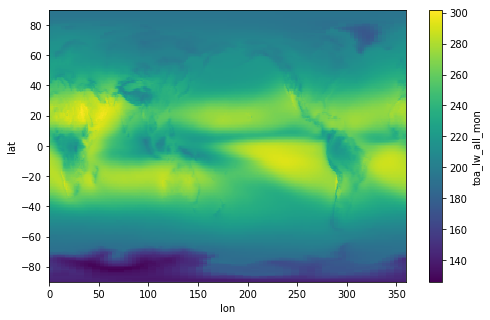

In [295]:
ds_means.toa_lw_all_mon.plot()

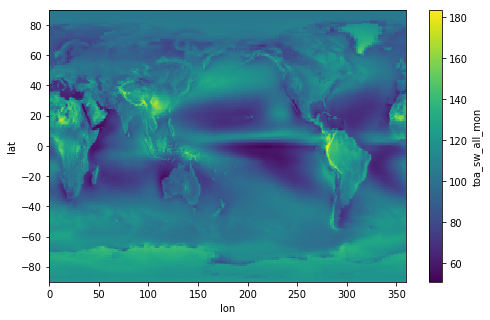

In [296]:
ds_means.toa_sw_all_mon.plot()

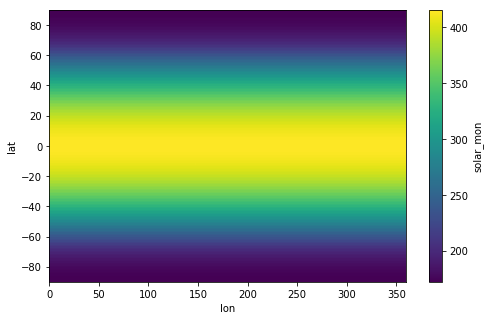

In [297]:
ds_means.solar_mon.plot()

## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

Again, you have to pay attention to and think about the sign conventions for each variable in order to get this to work.

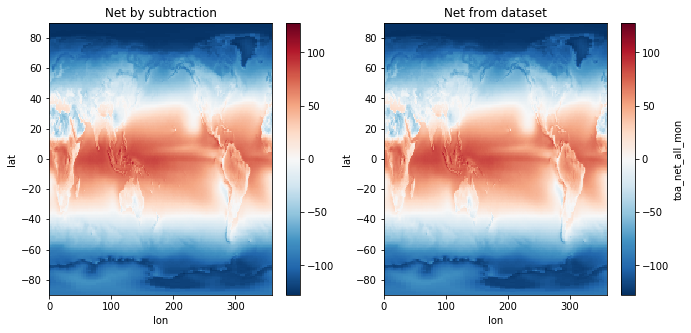

In [298]:
plt.rcParams['figure.figsize'] = (11,5)
plt.subplot(1,2,1)
(ds_means.solar_mon - ds_means.toa_sw_all_mon - ds_means.toa_lw_all_mon).plot()
plt.title('Net by subtraction')
plt.subplot(1,2,2)
ds_means.toa_net_all_mon.plot()
plt.title('Net from dataset')

## 3.1) Calculate the global mean of TOA net radiation directly from the dataset

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [299]:
ds.toa_net_all_mon.mean()

<xarray.DataArray 'toa_net_all_mon' ()>
array(-28.729012229018)

The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude)

## 3.2) Create a `weight` array proportional to $\cos(\lambda)$ with a mean value of 1

Verify its mean is 1 and plot it. Be careful about radians vs. degrees.

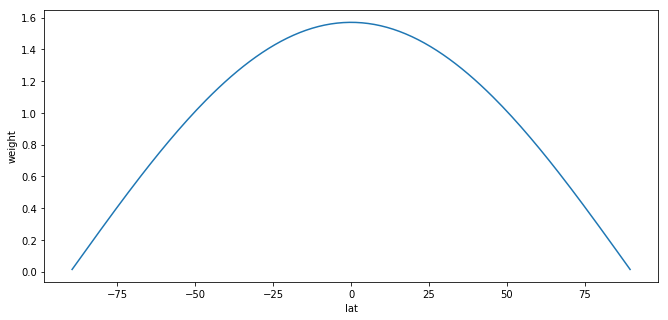

In [300]:
weight = np.cos(ds.lat/360*2*np.pi)
weight = weight/weight.mean()

weight.plot()
weight.mean()
plt.ylabel('weight')

## 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Remember Xarray's [handling of broadcasting](http://xarray.pydata.org/en/stable/computation.html#broadcasting-by-dimension-name). Don't make this harder than it needs to be.

In [301]:
(weight*ds.toa_net_all_mon).mean().values.tolist()

# climate change forcing in W/m2 is (e.g.) the 4.5 in RCP4.5 (relative to pre-industrial)

0.8780918673902521

This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimate to be. Do you think our calculation is precise enough to detect this? 

## 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above

In [302]:
print('shortwave mean: ',(weight*ds.toa_sw_all_mon).mean().values.tolist())
print(' longwave mean: ',(weight*ds.toa_lw_all_mon).mean().values.tolist())
print(' longwave mean: ',(weight*ds.solar_mon).mean().values.tolist())

#matches up to cartoon well

shortwave mean:  99.1390587571959
 longwave mean:  240.26802742152523
 longwave mean:  340.2851846576999


We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

## 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, I know the Earth is not a sphere...it's just a homework problem).

In [303]:
d_lat   = (ds.lat[1]  -  ds.lat[0])/360*2*np.pi
d_lon   = (ds.lon[1]  -  ds.lon[0])/360*2*np.pi
R       = 6371000 #m
area    = R**2*np.cos(ds.lat/360*2*np.pi)*d_lat*d_lon*xr.ones_like(ds_means.toa_cre_lw_mon)

print(area.sum().values.tolist())

a= 4*np.pi*R**2
print(a)

#looks pretty good


510070933636192.3
510064471909788.25


Multiplying the pixel area from above with the radiative flux gives you the total amount of radiation absorbed in each pixel

## 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band

Label with correct units

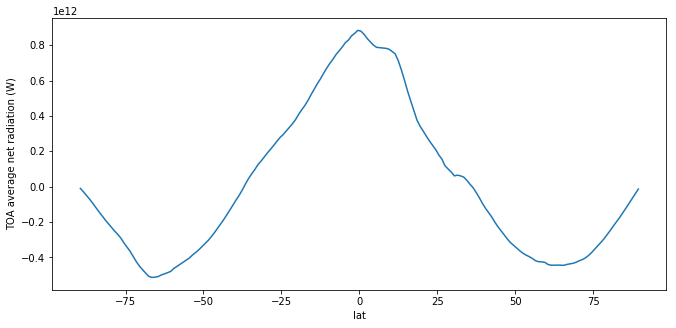

In [304]:
toa_net_total_bylat = (area*ds.toa_net_all_mon).mean(dim=('time','lon'))
toa_net_total_bylat.plot()
plt.ylabel('TOA average net radiation (W)')

## 4.3) Plot the cumulatuve sum in latitude of that quantity

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

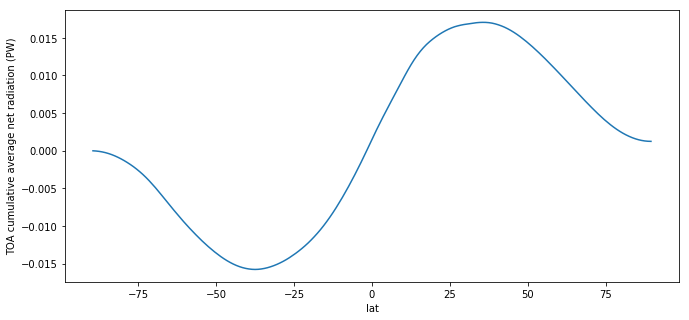

In [305]:
(toa_net_total_bylat.cumsum(dim='lat')/1e15).plot()
plt.ylabel('TOA cumulative average net radiation (PW)')

You should get a curve tht looks something like this

![meridional energy transport](http://www.cgd.ucar.edu/cas/papers/jclim2001a/Fig7.gif)

## 5.1) Plot the time-mean cloud area fraction (day and night)

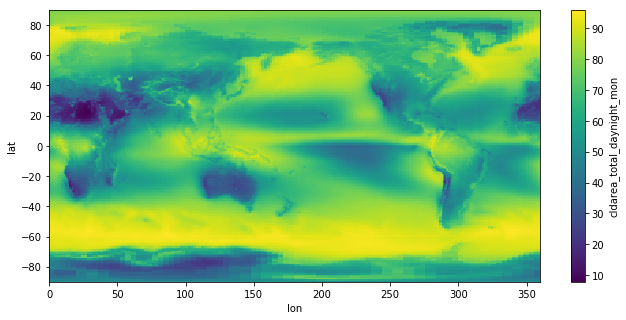

In [306]:
ds.cldarea_total_daynight_mon.mean('time').plot()

## 5.2) Define boolean masks for low cloud area ($\le$ 25%) and high cloud area ($\ge$ 75%)

Use the whole dataset, not the time mean.

In [307]:
b_high_cloud = ds.cldarea_total_daynight_mon>=75
b_low_cloud  = ds.cldarea_total_daynight_mon>=25

## 5.3) Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions

Your results should be 2D maps.

Xarray's [where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) function will be helpful.

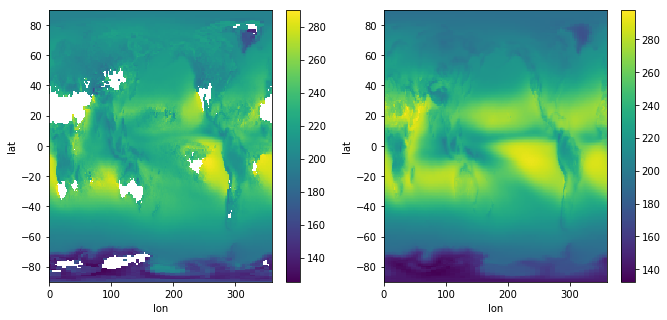

In [309]:
plt.subplot(1,2,1)
lw_mean_hicloud = ds.toa_lw_all_mon.where(b_high_cloud).mean('time')
lw_mean_hicloud.plot()

plt.subplot(1,2,2)
lw_mean_locloud = ds.toa_lw_all_mon.where(b_low_cloud).mean('time')
lw_mean_locloud.plot()

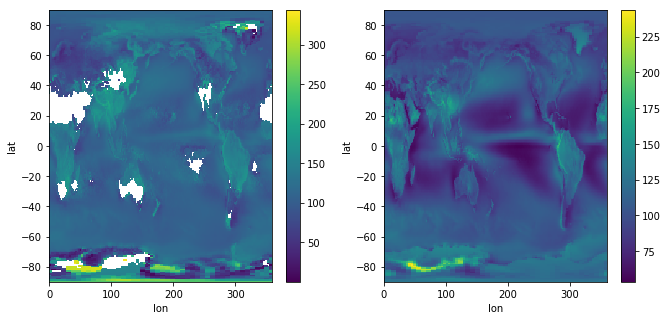

In [310]:
plt.subplot(1,2,1)
sw_mean_hicloud = ds.toa_sw_all_mon.where(b_high_cloud).mean('time')
sw_mean_hicloud.plot()

plt.subplot(1,2,2)
sw_mean_locloud = ds.toa_sw_all_mon.where(b_low_cloud).mean('time')
sw_mean_locloud.plot()

## 5.4) Using the `weight` factor from 3.2, calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions

What is the overall effect of clouds on shortwave and longwave radiation?

In [311]:
print('Longwave high clouds: ',(weight*lw_mean_hicloud).mean().values.tolist())
print(' Longwave low clouds: ',(weight*lw_mean_locloud).mean().values.tolist())

print('Shortwave high clouds: ',(weight*sw_mean_hicloud).mean().values.tolist())
print(' Shortwave low clouds: ',(weight*sw_mean_locloud).mean().values.tolist())


# Clouds increase shortwave flux and decrease longwave flux 
#    the increase in shortwave ~= decrease in longwave

Longwave high clouds:  223.26829943359868
 Longwave low clouds:  239.09427316311712
Shortwave high clouds:  111.93386651284725
 Shortwave low clouds:  100.1415922670002


## 6.1) Create a new dataset with the monthly seasonal cycle removed


In [312]:
month = ds.time.values.astype('datetime64[M]').astype(int)%12+1

ds['time.month']=month
ds2=ds.copy()

for var in ds.data_vars:
    print(var)
    anom = ds[var].groupby('time.month')-ds[var].groupby('time.month').mean('time')
    ds2[var]=anom
        


toa_sw_all_mon
toa_lw_all_mon
toa_net_all_mon
toa_sw_clr_mon
toa_lw_clr_mon
toa_net_clr_mon
toa_cre_sw_mon
toa_cre_lw_mon
toa_cre_net_mon
solar_mon
cldarea_total_daynight_mon
cldpress_total_daynight_mon
cldtemp_total_daynight_mon
cldtau_total_day_mon


<xarray.DataArray 'toa_sw_all_mon' ()>
array(2.800168416788572e-16)
Coordinates:
    lon      float32 286.5
    lat      float32 40.5

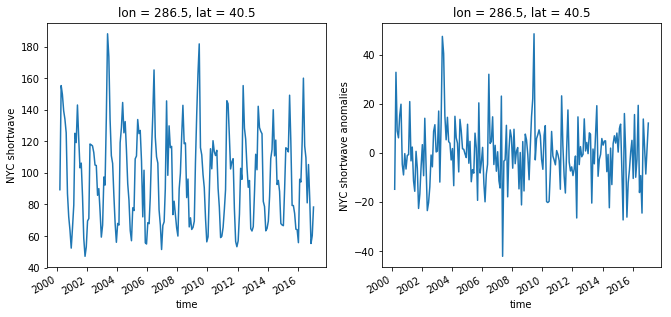

In [313]:
#verify the new dataset is anomalies
# by looking at shortwave here in nyc
sw      =  ds.toa_sw_all_mon
sw_anom = ds2.toa_sw_all_mon

y  = sw.sel(lat=40.7,lon=360-74,method='nearest')
y2 = sw_anom.sel(lat=40.7,lon=360-74,method='nearest')
plt.rcParams['figure.figsize'] = (11,5)
plt.subplot(1,2,1)
y.plot()
plt.ylabel('NYC shortwave')
plt.subplot(1,2,2)
y2.plot()
plt.ylabel('NYC shortwave anomalies')
#plot passes eye test


y2.mean()
#mean = 0




## 6.2) Load the NINO3.4 index data we calculated and output during class and add it as a coordinate variable to the anomaly dataset

In [314]:
nino_ds = xr.open_dataset('/Users/kennedy/Desktop/rescomp/nino34_index.nc')
ds2['nino34']=nino_ds['nino34']
ds2.set_coords('nino34')


<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203, time.month: 203)
Coordinates:
  * time                         (time) datetime64[ns] 2000-03-15 2000-04-15 ...
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
  * time.month                   (time.month) int64 3 4 5 6 7 8 9 10 11 12 1 ...
    month                        (time) int64 3 4 5 6 7 8 9 10 11 12 1 2 3 4 ...
    nino34                       (time) object 'nina' 'nina' 'nina' 'nina' ...
Data variables:
    toa_sw_all_mon               (time, lat, lon) float64 -1.255 -1.255 ...
    toa_lw_all_mon               (time, lat, lon) float64 -2.218 -2.218 ...
    toa_net_all_mon              (time, lat, lon) float64 1.641 1.641 1.641 ...
    toa_sw_clr_mon               (time, lat, lon) float64 5.846 5.846 5.846 ...
    toa_lw_clr_mon               (time, lat, lon) float64 -2.841 -2.841 ...
  

## 6.3) Calculate and plot the mean difference in net radiation between El Nino and La Nina periods

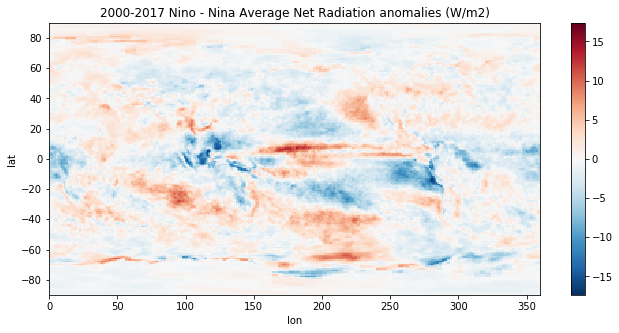

In [315]:
net_nino=ds2.toa_net_all_mon.where(ds2.nino34=='nino').mean(dim='time')
net_nina=ds2.toa_net_all_mon.where(ds2.nino34=='nina').mean(dim='time')
(net_nino-net_nina).plot()

plt.title('2000-2017 Nino - Nina Average Net Radiation anomalies (W/m2)')